# $$\textit{inference}$$
$$\text{Schwartz}$$

# Why is it $n-1$? 
### The proof for $E[S^2] = E\left[\sum_{i=1}^n \frac{(X_i-\bar X)^2}{n-1}\right] = \sigma^2$ 

<img src="stuff/inmunusone.png" width="900px" align="left"> 


## Yesterday you did the "forward problem" of the discipline of statistcs:
### Given distributions and parameters, you made some statements about data (i.e., random variables) 


## Today we do the "inverse problem" of the discipline of statistics:
### Given data (i.e., random variables) we say something about distributions and their parameters 


# Objectives



- _Populations_ (i.e., Distributions and their Parameters) versus _Samples_ (statistics) 
- Distribution Estimation (point estimation)
    - Kernel Density Estimation
    - Method of Moments
    - Maximum Likelihood Estimation

- Inference (uncertainty estimation)
    - Central Limit Theorem
    - Confidence Intervals
    - Bootstrapping 
        - Bootstrapped Confidence Intervals
        

In [1]:
### don't write import scipy.stats as scs -- it's *stupid*
# from scipy import stats
from scipy import stats

In [3]:
### tab complete and ? and google
stats.poisson.rvs(mu=10, size=30)

array([ 9,  7,  5, 11,  8, 15, 14, 11,  4, 15,  9, 12, 13, 11, 12, 10, 12,
        6,  7, 14,  4, 12,  5,  7,  7,  2,  9,  8,  8,  6])

In [4]:
# more general code
# sample = getattr(stats, "poisson").rvs(mu=10, size=30)
pars = {'mu': 10, 'size': 30}
sample = getattr(stats, "poisson").rvs(**pars)

In [5]:
import numpy as np

def generate_sample(n=30, model="uniform", pars={"loc":0, "scale":1}, population=None):
    '''Generate a sample of size "n" [int] from any "model" [string] 
    specified by "pars" [dictionary of parameter values]; or, 
    specifiy a population of numbers to sample from [list]'''
    
    if population is not None:
        return np.random.choice(population, n)
    else:    
        return getattr(stats,model).rvs(size=n,**pars)

In [6]:
# print generate_sample()
sample = generate_sample(30, "poisson", {"mu":10})
print sample

[13  9 10 11  9  7 17  7 16 11  9 12 11 13 12  5 10  5  6 13 14  8  7  5 10
 16 11 10 10 18]


In [7]:
### get used to these -- you'll use them for like *every* jupyter notebook evar
### "%matplotlib inline" allows inline figures (and plt.show() isn't needed)

import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# convenience so you don't have to call e.g., "plt.figure(figsize=[8,4])" every time
from pylab import rcParams
rcParams['figure.figsize'] = 12, 5

(0, 30)

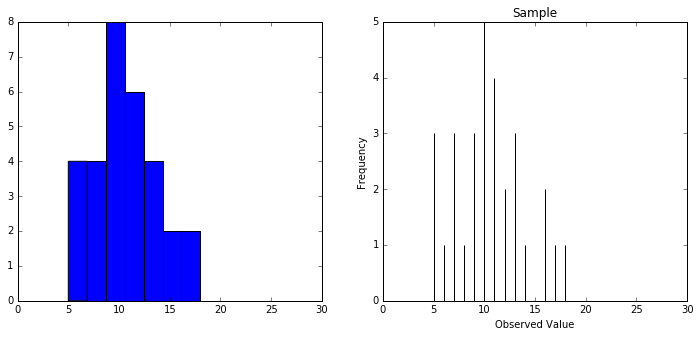

In [9]:
### Here is exactly what the data is
fig = plt.figure(figsize = [12, 5])

plt.subplot(121)
plt.hist(sample, bins = 7)
plt.xlim([0,30])

### Histograms require bin specifications...
from collections import Counter
value, count = zip(*Counter(sample).items())
value_proportion = np.array(count)/float(sum(count))

plt.subplot(122)
plt.vlines(value, 0, count)
plt.title("Sample")
plt.xlabel("Observed Value")
plt.ylabel("Frequency")
plt.xlim([0,30])
#plt.show()

In [10]:
def plot_sample(sample, support, smooth=None, width=20):
    '''Arguments sample and support are required.
    Raw data, histogram, and kernel density estimation representations are available.

    Integer valued data points are treated as a sample from a discrete distribution.
    Real valued data points are treated as a sample from a continuous distribution
    Discrete data is ploted in think blue; continuous data is plotted in thin red.
        
    support: tuple (of min and max range to examine)
    sample: list (of samples)
    smooth: text ("hist" or "kde")
    width: number (bin width for "hist", kernel sd for "kde")'''
    
    value, count = zip(*Counter(sample).items())
    count = np.array(count)
    value_proportion = count/float(sum(count))

    if all(map(lambda x: issubclass(type(x), int), sample)):
        linecolor = 'b'; linewidth = 5; support = range(*support)
    else:
        linecolor = 'r'; linewidth = 1; support = np.linspace(*support, num=500)
        
    if smooth is "hist":
        plt.hist(sample, bins=int(np.ptp(support)/width), color=linecolor)
    elif smooth is "kde":
        #stats.norm scale parameter specifies the *standard deviation* 
        density=[sum(stats.norm.pdf(sample, loc=mu, scale=width)) for mu in support]
        plt.plot(support,np.array(density)/float(len(sample)), color=linecolor, lw=linewidth)
    else:
        plt.vlines(value, 0, value_proportion, colors=linecolor, lw=linewidth, alpha=.5)     
        
    plt.xlim([min(support)-1,max(support)+1])

In [11]:
def plot_distribution(model, support, pars, colr = 'k', tf=lambda x: x):
    '''model: text of distribution name
    pars: dictionary of distribution parameters
    support: tuple of limits of the range of the distribution to examine
    tf: transforms densities by applying a function to the distribution value
     -- e.g., scale or log transform the value
    '''
    if issubclass(type(getattr(stats,model)), stats.rv_continuous):
        support = np.linspace(*support, num=200)
        plt.plot(support, tf(getattr(stats,model).pdf(support, **pars)), color=colr, lw=1)
    else:
        support = np.arange(*support)
        plt.vlines(support, 0, getattr(stats,model).pmf(support, **pars), colors=colr, lw=1)
        plt.plot(support,getattr(stats,model).pmf(support, **pars), color=colr, ls='', ms=10, marker='.')

In [12]:
def label_plot(xlab, ylab, title):
    '''xlab, ylab, title, in that order'''
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)

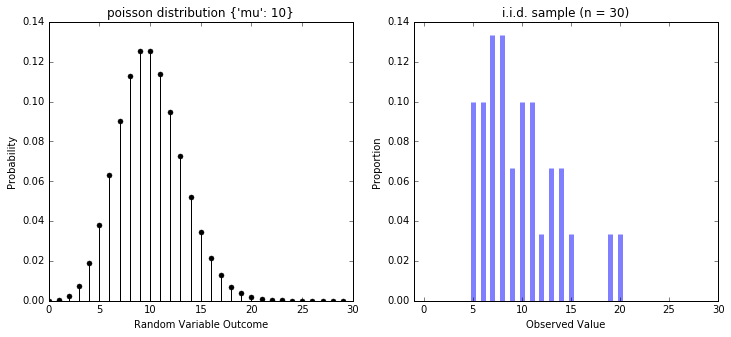

In [17]:
model = "poisson"
pars = {"mu":10}
n = 30
sample = generate_sample(n, model, pars)
support = [0, 30]

plt.subplot(121)
plot_distribution(model, support, pars)
label_plot("Random Variable Outcome", "Probability", model + " distribution " + str(pars))
    
plt.subplot(122)
plot_sample(sample, support)
label_plot("Observed Value", "Proportion","i.i.d. sample (n = " + str(n) + ")")

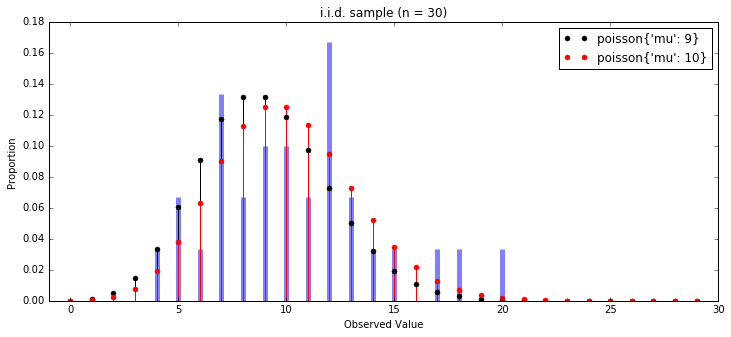

In [19]:
sample = generate_sample(n, model, pars)
plot_sample(sample, support)
plt.ylabel("Proportion")
plt.xlabel("Observed Value")
plt.title("i.i.d. sample (n = " + str(n) + ")")

model = "poisson"
pars1 = {"mu": 9}
plot_distribution(model, support, pars1)
pars2 = {"mu": 10}
plot_distribution(model, support, pars2, 'r')
plt.legend([model+str(pars1),model+str(pars2)], loc='best')

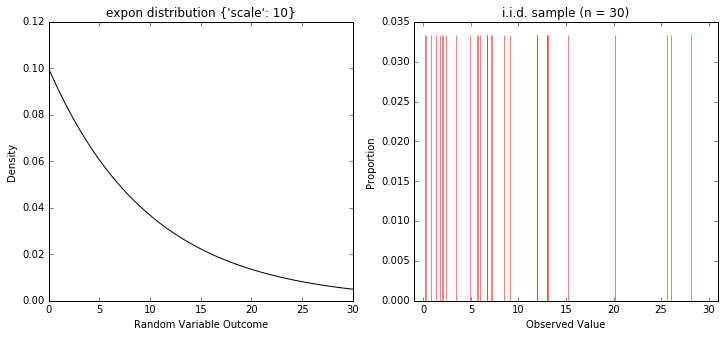

In [20]:
model = "expon"
pars = {"scale":10}
n = 30
sample = generate_sample(n,model,pars)
support = [0, 30]

plt.subplot(121)
plot_distribution(model, support, pars)
label_plot("Random Variable Outcome", "Density", model + " distribution " + str(pars))

plt.subplot(122)
plot_sample(sample, support)
label_plot("Observed Value", "Proportion", "i.i.d. sample (n = " + str(n) + ")")

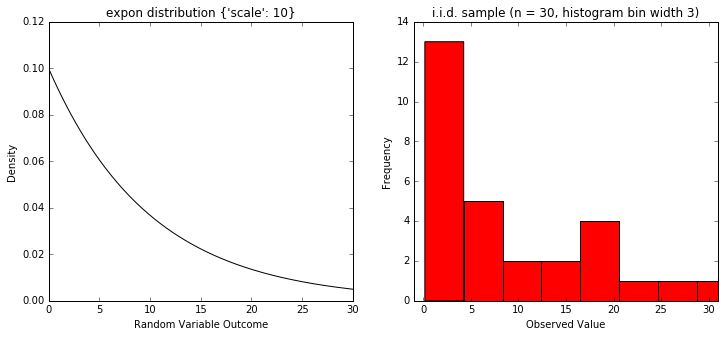

In [21]:
plt.subplot(121)
plot_distribution(model, support, pars)
label_plot("Random Variable Outcome", "Density", model + " distribution " + str(pars))

plt.subplot(122)
bw=3
sample = generate_sample(n,model,pars)
plot_sample(sample, support, smooth='hist', width=bw)
label_plot("Observed Value", "Frequency", "i.i.d. sample (n = " + str(n) + ", histogram bin width " + str(bw) + ")")

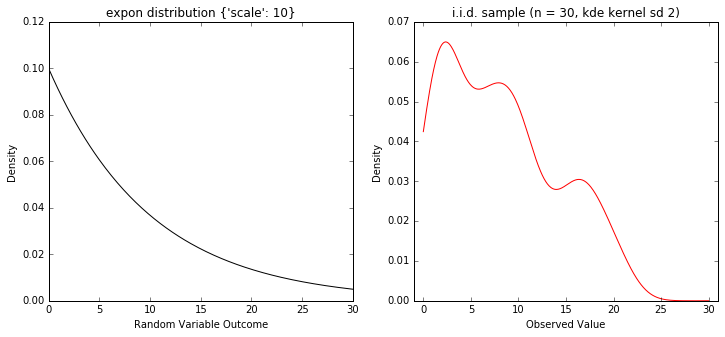

In [24]:
plt.subplot(121)
plot_distribution(model, support, pars)
label_plot("Random Variable Outcome", "Density", model + " distribution " + str(pars))

plt.subplot(122)
bw=2
sample = generate_sample(n,model,pars)
plot_sample(sample, support, smooth = 'kde', width=bw)
label_plot("Observed Value", "Density", "i.i.d. sample (n = " + str(n) + ", kde kernel sd " + str(bw) + ")")

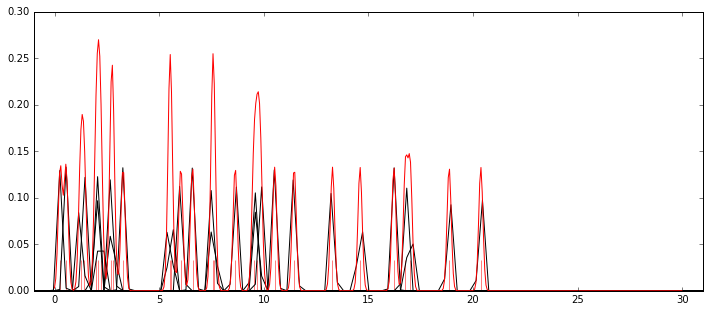

In [27]:
# demonstrate comment command
plot_sample(sample, support)

sd=.1
for x in sample:
    plot_distribution("norm", [-10, 50], {"loc":x, "scale":sd}, tf=lambda x: np.array(x)/float(len(sample)))
    
plot_sample(sample, support, smooth='kde', width=sd)

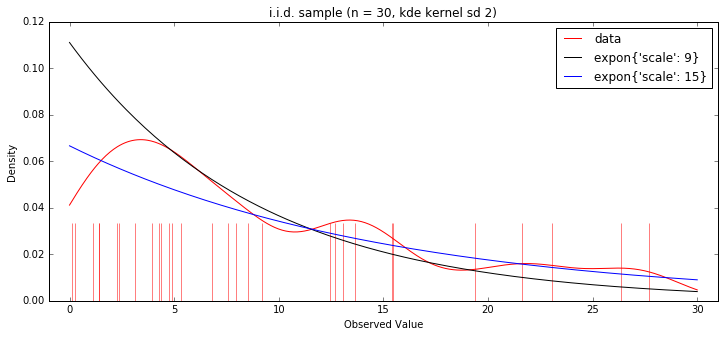

In [28]:
sample = generate_sample(n,model,pars)
plot_sample(sample, support)

plot_sample(sample, support, smooth='kde', width=2)
label_plot("Observed Value", "Density", "i.i.d. sample (n = " + str(n) + ", kde kernel sd " + str(bw) + ")")

pars1 = {"scale":9}
plot_distribution(model, support, pars1)
pars2 = {"scale":15}
plot_distribution(model, support, pars2,'b')
plt.legend(["data", model+str(pars1),model+str(pars2)], loc='best')

# For a _Poisson distributed_ random variable $X$

# $\begin{align} 
Pr(X=x|\lambda) &= \frac{\lambda^x e^{-\lambda}}{x!} \\
\text{ we have that } &\\
E[X] &= \sum_{x=0}^{\infty}x \cdot Pr(X=x|\lambda) \\
&= \sum_{x=1}^{\infty}x \frac{\lambda^x e^{-\lambda}}{x!} \\
&= \lambda \;& (= \mu)\\
{}\\
Var[X] &=\sum_{x=0}^{\infty}(x-E[X])^2 \cdot Pr(X=x|\lambda) \\
&= \sum_{x=1}^{\infty}(x-E[X])^2 \frac{\lambda^x e^{-\lambda}}{x!} \\
&= \lambda \; &(= \sigma^2)\\
\end{align}$

<br>

### (so, interestingly, the expected value and variance of a Poisson random variable $X$ are the same)

<br>

# Consider these two estimators:
# $$\begin{align} 
\bar X &= \frac{1}{n}\sum_{i=1}^n X_i \\
S^2 &= \frac{1}{n-1}\sum_{i=1}^n (X_i-\bar X)^2 
\end{align}$$
# Their expected values are:
# $$\begin{align} 
E[\bar X] &= E[X] \\
E[S^2] &= Var[X] 
\end{align}$$
## So $\bar X$ and $S^2$ are, in some sense, good estimators of $E[X]$ and $Var[X]$, respectively

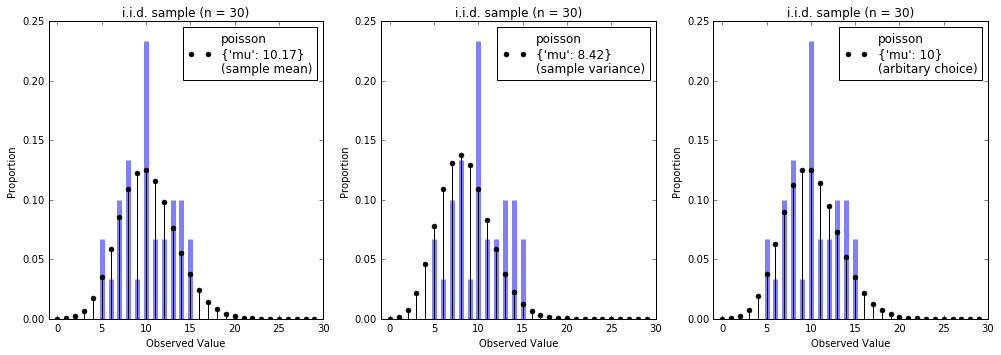

In [29]:
model = "poisson"
pars = {"mu":10}
n = 30
sample = generate_sample(n,model,pars)
support = [0, 30]

plt.figure(figsize=[14,5])
plt.subplot(131)
plot_sample(sample, support)
label_plot("Observed Value", "Proportion", "i.i.d. sample (n = " + str(n) + ")")
pars1 = {"mu":round(np.mean(sample),2)}
plot_distribution(model, support, pars1)
plt.legend([model+"\n"+str(pars1)+"\n(sample mean)"], loc='best')

plt.subplot(132)
plot_sample(sample, support)
label_plot("Observed Value", "Proportion", "i.i.d. sample (n = " + str(n) + ")")
pars2 = {"mu":round(np.var(sample, ddof=1),2)}
plot_distribution(model, support, pars2)
plt.legend([model+"\n"+str(pars2)+"\n(sample variance)"], loc='best')

plt.subplot(133)
plot_sample(sample, support)
label_plot("Observed Value", "Proportion", "i.i.d. sample (n = " + str(n) + ")")
pars3 = {"mu": 10}
plot_distribution(model, support, pars3)
plt.legend([model+"\n"+str(pars3)+"\n(arbitary choice)"], loc='best')

plt.tight_layout()

# For a _Exponentially distributed_ random variable $X$

# $\begin{align} 
f(X=x|\lambda) &= \lambda e^{-\lambda x}\\
\text{ we have that } &\\
E[X] &= \int_{x=0}^{\infty}x f(X=x|\lambda) dx \\
 &= \int_{x=0}^{\infty}x \lambda e^{-\lambda x} dx \\
 &= \lambda^{-1} \; &(= \mu) \\
Var[X] &=\int_{x=0}^{\infty}(x-E[X])^2 \cdot f(X=x|\lambda) dx \\
&= \int_{x=1}^{\infty}(x-E[X])^2 \lambda e^{-\lambda x} dx \\
&= \lambda^{-2} \;&(= \sigma^2)\\
\end{align}$

### so the $E[X]$ and $Var[X]$ of an exponential random variable $X$ are simple functions of the parameter $\lambda$ 

### [The exponential distribution can be parameterized using the ''rate'' $\lambda$ or the ''scale'' $\lambda^{-1}$]

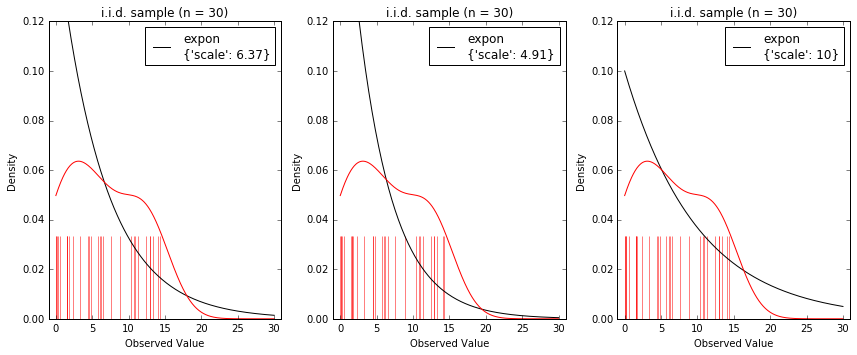

In [30]:
model = "expon"
pars = {"scale":10}
n = 30
sample = generate_sample(n,model,pars)
support = [0, 30]
bw=3

plt.subplot(131)
pars1 = {"scale":round(np.mean(sample),2)}
plot_distribution(model, support, pars1)
plt.legend([model+"\n"+str(pars1)], loc='best')
plot_sample(sample, support)
plot_sample(sample, support, "kde", bw)
label_plot("Observed Value", "Density", "i.i.d. sample (n = " + str(n) + ")")
plt.ylim([0, .12])

plt.subplot(132)
pars2 = {"scale":round(np.sqrt(np.var(sample, ddof=1)),2)}
plot_distribution(model, support, pars2)
plt.legend([model+"\n"+str(pars2)], loc='best')
plot_sample(sample, support)
plot_sample(sample, support, "kde", bw)
label_plot("Observed Value", "Density", "i.i.d. sample (n = " + str(n) + ")")
plt.ylim([0, .12])

plt.subplot(133)
pars3 = {"scale":10}
plot_distribution(model, support, pars3)
plt.legend([model+"\n"+str(pars3)], loc='best')
plot_sample(sample, support)
plot_sample(sample, support, "kde", bw)
label_plot("Observed Value", "Density", "i.i.d. sample (n = " + str(n) + ")")
plt.ylim([0, .12])

plt.tight_layout()

# _Method of Moments_

# 1. find a statistic estimating the parameter
# 2. calculate the statistic from the sample 
# 3. "plug and play" in the population

<br>
# And now for an *alternative* to *Method of Moments*: Maximum Likelihood
<br>

In [31]:
import math

In [33]:
def poisson_pmf(x, lamda):
    return (lamda**x) * np.exp(-lamda)/math.factorial(x)

In [34]:
# poisson_pmf(x=10, lamda=np.array([1,2,4]))
poisson_pmf(x=10,lamda=np.array([8,9,10,11]))

array([ 0.09926153,  0.11858008,  0.12511004,  0.11937806])

In [35]:
def exponential_pdf(x, lamda):
    return lamda * np.exp(-lamda * x)

In [36]:
exponential_pdf(x=10, lamda=np.array([1,2,4]))

array([  4.53999298e-05,   4.12230724e-09,   1.69934170e-17])

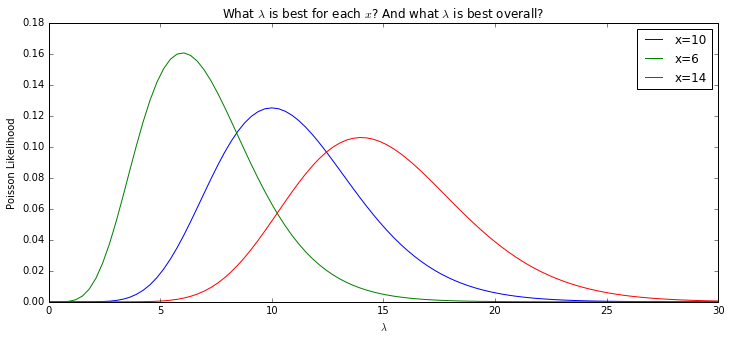

In [37]:
lambdas = np.linspace(0, 30, 100)
x1 = 10
x2 = 6
x3 = 14
plt.plot(lambdas, poisson_pmf(x=x1, lamda=lambdas))
plt.plot(lambdas, poisson_pmf(x=x2, lamda=lambdas))
plt.plot(lambdas, poisson_pmf(x=x3, lamda=lambdas))
label_plot("$\lambda$", "Poisson Likelihood", "What $\lambda$ is best for each $x$? And what $\lambda$ is best overall?")
plt.legend(["x="+str(x1), "x="+str(x2), "x="+str(x3)])

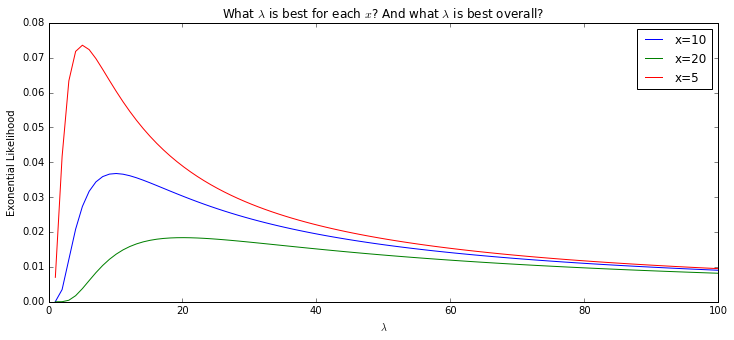

In [38]:
one_over_lambdas = np.linspace(0,100,100)[1:]
x1=10
x2=20
x3=5
plt.plot(one_over_lambdas, exponential_pdf(x=10, lamda=1/one_over_lambdas))
plt.plot(one_over_lambdas, exponential_pdf(x=20, lamda=1/one_over_lambdas))
plt.plot(one_over_lambdas, exponential_pdf(x=5, lamda=1/one_over_lambdas))
label_plot("$\lambda$", "Exonential Likelihood", "What $\lambda$ is best for each $x$? And what $\lambda$ is best overall?")
plt.legend(["x="+str(x1), "x="+str(x2), "x="+str(x3)])

# The Poisson distribution likelihood for parameter $\lambda$ is

# $$\begin{align}
 &\; Pr(X_1=x_1, X_2=x_2, \cdots, X_n=x_n|\lambda) \\
=&\; Pr(X_1=x_1|\lambda)Pr(X_2=x_2|\lambda)\cdots Pr(X_n=x_n|\lambda)\\
=&\; \prod_{i=1}^n Pr(X_i=x_i|\lambda)\\
=&\; \prod_{i=1}^n \frac{\lambda^{x_i} e^{-\lambda}}{x_i!}\\
=&\; \frac{\lambda^{x_1} e^{-\lambda}}{x_1!}\frac{\lambda^{x_2} e^{-\lambda}}{x_2!}\cdots\frac{\lambda^{x_n} e^{-\lambda}}{x_n!}\\
=&\; L(\lambda|X_1=x_1, X_2=x_2, \cdots, X_n=x_n)
\end{align}$$
### since $ f(X=x|\lambda) = \lambda e^{-\lambda x}$ and we assume observations are independent

# The exponential distribution likelihood for rate parameter $\lambda$

# $$\begin{align}
&\; f(X_1=x_1, X_2=x_2, \cdots, X_n=x_n|\lambda) \\
=&\; f(X_1=x_1|\lambda)f(X_2=x_2|\lambda)\cdots f(X_n=x_n|\lambda)\\
=&\; \prod_{i=1}^n f(X_i=x_i|\lambda)\\
=&\; \prod_{i=1}^n \lambda e^{-\lambda x_i}\\
=&\; \lambda e^{-\lambda x_1}\lambda e^{-\lambda x_2}\cdots\lambda e^{-\lambda x_n}\\
=&\; L(\lambda|X_1=x_1, X_2=x_2, \cdots, X_n=x_n)
\end{align}$$

### since $ f(X=x|\lambda) = \lambda e^{-\lambda x}$ and we assume observations are independent

<br>
# So how do we get the likelihood of *all the data* for the above plots?
<br>

<br>
# Diversion: how can one find the *maximum* of a function?
<br>

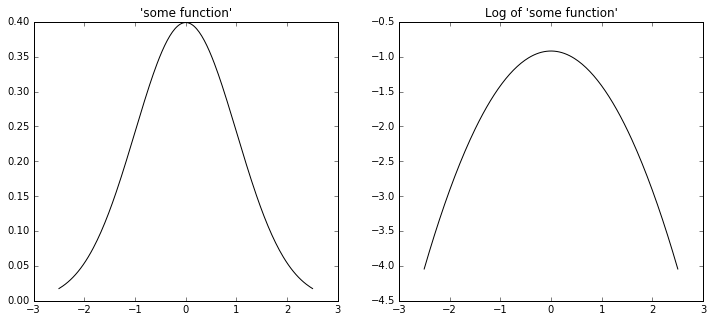

In [39]:
plt.subplot(121)
plot_distribution("norm", [-2.5, 2.5], {"loc":0, "scale":1})
label_plot("", "", "'some function'")

plt.subplot(122)
plot_distribution("norm", [-2.5, 2.5], {"loc":0, "scale":1}, tf=lambda x: np.log(np.array(x)))
label_plot("", "", "Log of 'some function'")

# $\textit{"The log of the product is the sum of the logs", so}$

# The Poisson distribution $log$ likelihood for parameter $\lambda$ is

# $$\begin{align}
&\; log L(\lambda|X_1=x_1, X_2=x_2, \cdots, X_n=x_n) \\
=&\; log \left(\frac{\lambda^{x_1} e^{-\lambda}}{x_1!} \frac{\lambda^{x_2} e^{-\lambda}}{x_2!} \cdots \frac{\lambda^{x_n} e^{-\lambda}}{x_n!}\right)\\
=&\; log \left(\frac{\lambda^{x_1} e^{-\lambda}}{x_1!}\right)+log\left(\frac{\lambda^{x_2} e^{-\lambda}}{x_2!}\right)+\cdots +log\left(\frac{\lambda^{x_n} e^{-\lambda}}{x_n!}\right)\\
=&\; \sum_{i=1}^n log \left(\frac{\lambda^{x_i} e^{-\lambda}}{x_i!}\right)\\
\end{align}$$

### $\text{since } L(\lambda|X_1=x_1, X_2=x_2, \cdots, X_n=x_n) = \prod_{i=1}^n\frac{\lambda^{x_i} e^{-\lambda}}{x_i!} = 
\frac{\lambda^{x_1} e^{-\lambda}}{x_1!}\frac{\lambda^{x_2} e^{-\lambda}}{x_2!}\cdots\frac{\lambda^{x_n} e^{-\lambda}}{x_n!}$


# The exponential distribution $log$ likelihood for rate $\lambda^{-1}$ is

# $$\begin{align}
&\; log L(\lambda|X_1=x_1, X_2=x_2, \cdots, X_n=x_n)\\
=&\; log\left(\lambda e^{-\lambda x_1} \lambda e^{-\lambda x_2} \cdots \lambda e^{-\lambda x_n}\right)\\
=&\; log\left(\lambda e^{-\lambda x_1}\right)+log\left(\lambda e^{-\lambda x_2}\right)+\cdots+ log\left(\lambda e^{-\lambda x_n}\right)\\
=&\; \sum_{i=1}^n log\left(\lambda e^{-\lambda x_i}\right)\\
\end{align}$$

### $\text{since } L(\lambda|X_1=x_1, X_2=x_2, \cdots, X_n=x_n) = \prod_{i=1}^n \lambda e^{-\lambda x_i} = \lambda e^{-\lambda x_1}\lambda e^{-\lambda x_2}\cdots\lambda e^{-\lambda x_n}$

In [40]:
def loglikelihood(sample, model, pars):
    if issubclass(type(getattr(stats,model)), stats.rv_continuous):
        ll = lambda x: np.log(getattr(stats,model).pdf(x,**pars))
    else:
        ll = lambda x: np.log(getattr(stats,model).pmf(x,**pars))
    
    log_likelihood = 0
    for x in sample:
            log_likelihood = log_likelihood + ll(x)

    return log_likelihood

In [41]:
sample = [1, 2, 4, 5, 6]
model = "poisson"
pars = {'mu': [3, 5, 6]}

loglikelihood(sample, model, pars)

array([-10.46292277, -11.26806154, -12.98627352])

[ 5  9 11  6  9 14 13 10  5 12 10 15 10 18  6 11  7  7 15 10 20 13 10  8 14
  9 13  9 12  4]
mean: 10.5


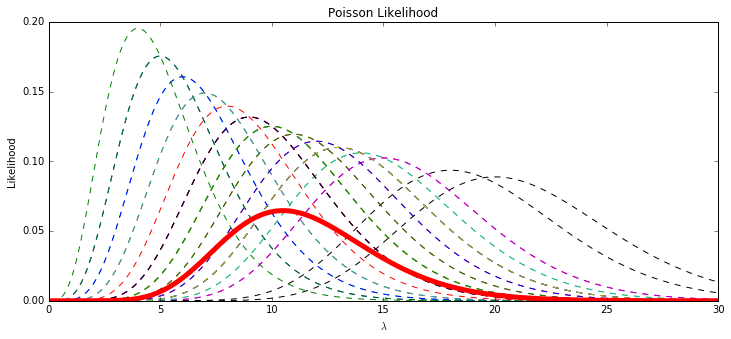

In [42]:
model = "poisson"
pars = {'mu': 10}
n = 30
sample = generate_sample(n, model, pars)

print sample
print "mean: "+str(round(np.mean(sample),2))

support = np.linspace(0, 30, 300)[1:]
pars = {'mu': support}          

for x in sample:
    plt.plot(support, np.exp(loglikelihood([x], model, pars)), ls='--')

plt.plot(support, np.exp(loglikelihood(sample, model, pars))**(1./n), lw=5)
label_plot("$\lambda$", "Likelihood", "Poisson Likelihood")

In [ ]:
for x in sample:
    plt.plot(support, loglikelihood([x], model, pars), ls='--')

plt.plot(support, loglikelihood(sample, model, pars)/len(sample), lw=5)
label_plot("$\lambda$", "Log Likelihood", "Poisson Log Likelihood")

In [ ]:
model = "expon"
pars = {'scale': 10}
n = 30
sample = generate_sample(n, model, pars)

print sample
print "mean: "+str(round(np.mean(sample),2))

support = np.linspace(5, 30, 300)[1:]
pars = {'scale': support}          

for x in sample:
    plt.plot(support, np.exp(loglikelihood([x], model, pars)), ls='--')

plt.plot(support, np.exp(loglikelihood(sample, model, pars))**(1./n), lw=5)
label_plot("$\lambda$", "Likelihood", "Exponential Likelihood")

In [ ]:
for x in sample:
    plt.plot(support, loglikelihood([x], model, pars), ls='--')

support = np.linspace(0, 30, 300)[1:]
plt.plot(support, loglikelihood(sample, model, pars)/len(sample), lw=5)
label_plot("$\lambda$", "Log Likelihood", "Exponential Log Likelihood")

# Review

- Histograms versus KDE (weighted sum of continuous distributions)? (bins versus bandwidth, edge effects)
- Method of Moments: plug and play $E[\bar x] = \mu$? (nice for continuous, lower moments better)
- likelihood function $10 e^{-\lambda 10}$ of data point ? 
- likelihood function of a sample $10 e^{-\lambda 10} \times 5 e^{-\lambda 5} \times \cdots$?
- log-likelihood? (for numerical precision) 
- maximum likelihood estimation? 

<br>
# $$\textbf{Beating the House}$$

Blackjack can be legally beaten by keeping track of the probability of getting a high card (10,J,Q,K,A) compared to a low card (2,3,4,5,6). This is called $card$ $counting$.  In early 1979, four MIT students taught themselves card counting and along with a professional gambler and an investor who put up most of their capital (\$5,000) went to Atlantic City for spring break.  They went again in December and then recruited a few more MIT students as "students" for a "blackjack class". The "class" continued to visit Atlantic City intermittently until May 1980 (when the students graduated), during which time they increased their capital four-fold.  

<table align="center">
<tr><td>
<table align="center">
<tr><td></td><td>House</td></tr>
<tr><td>Game</td><td>Advantage</td></tr>
<tr><td>Baccarat (no tie bets)</td><td>1.2%</td></tr>
<tr><td>Craps (pass/come)</td><td>1.4%</td></tr>
<tr><td>Blackjack (average player)</td><td>2.0%</td></tr>
<tr><td>Video Poker (average player)</td><td>0.5-3.0%</td></tr>
<tr><td>Roulette (double-zero)</td><td>5.3%</td></tr>
<tr><td>Slots</td><td>5.0-10.0%</td></tr>
<tr><td>Keno (average)</td><td>27.0%</td></tr>
</table>
</td><td>
<table align="center">
<tr><td>
<img src="stuff/vegas.png" width="360px" align="center"> 
</tr></td>
</table>
</td></tr>
</table>

At about the same time, Bill Kaplan returned to Cambridge after successfully running a blackjack team in Las Vegas.  Kaplan earned his BA at Harvard in 1977 and was accepted into Harvard Business School but delayed admission while he ran the blackjack team. Kaplan ran his operation using funds he received upon graduation as Harvard's "outstanding scholar-athlete" and generated more than a 35 fold rate of return in less than nine months of play.  Kaplan continued to run his Las Vegas blackjack team as a sideline while attending Harvard Business School but by the time of his graduation the players were so "burnt out" the team disbanded. 



# Central Limit Theorem (CLT)

#### With _enough_ i.i.d. samples $X_i, i = 1, 2, \cdots, n$  from _ANY_ distribution $p(\mu, \sigma^2), \text{ i.e. } E[X_i] = \mu, Var[X_i] = \sigma^2 \text{ for all } i,$ the sampling distribution of 
### $$\begin{align}
\bar X &= \frac{1}{n}\sum_{i=1}^n X_i\\
\text{is $\quad$}\\
& \bar X \overset{\tiny approx}{\sim} N\left(\mu, \frac{\sigma^2}{n}\right)
&\text{[if paramaterized by variance]}\\
\text{or $\quad$}\\
& \bar X \overset{\tiny approx}{\sim} N\left(\mu, \frac{\sigma}{\sqrt{n}}\right) &\text{[if paramaterized by the standard deviation]}
\end{align}
$$ 

# The amazing thing about the CLT is the _normality_ (not the variance result)



## $$Var[\bar X] = Var\left[\frac{1}{n}\sum_{i=1}^n X_i\right] = \frac{1}{n^2} \sum_{i=1}^n Var\left[X_i\right] = \frac{1}{n^2} \sum_{i=1}^n \sigma^2 = \frac{\sigma^2}{n}$$

### (The formula governing decreasing variance for increasing $n$ is simply the result of the variance of an average)

<br>
## $$E[\bar X] = E\left[\frac{1}{n}\sum_{i=1}^n X_i\right] = \frac{1}{n} \sum_{i=1}^n E\left[X_i\right] = E\left[X_i\right] = \mu$$
### (The expected value of an average of i.i.d. random variables is the  [identical] expected values of those variables)



<br>
# Let's explore what "_enough_ i.i.d. samples" means...

In [ ]:
model = "expon"
pars = {"scale":10}
n = 30
support = [0, 30]
plot_distribution(model,support,pars,'k')
plt.legend([model+"\n"+str(pars)], loc='best')

sample = generate_sample(n,model,pars)
plot_sample(sample,support)
plot_sample(sample,support, "kde", 1)
label_plot("Observed Value", "Density", "i.i.d. sample (n = " + str(n) + ")")

In [ ]:
n=300
plot_sample([np.mean(generate_sample(n, model,pars)) for j in range(100)], support)
label_plot("", "", "Observed $\\bar X$'s")

In [ ]:
n=30
r=10000
plot_sample([np.mean(generate_sample(n,model,pars)) for j in range(r)], support, "kde", .08)
plot_distribution('norm', support,{"loc": 10, "scale": 10/np.sqrt(n)}, 'k')
plt.legend(["Observed Distribution of $\\bar X$'s", "Theoretical Distribution of $\\bar X$'s"])

# So if $n$ is _large enough_ then $\bar X \overset{\tiny approx}{\sim} N\left(\mu, \frac{\sigma}{\sqrt{n}}\right)$

# and $$Pr\left(\mu - 1.96 \frac{\sigma}{\sqrt{n}} < \bar X < \mu + 1.96 \frac{\sigma}{\sqrt{n}}\right) = 0.95$$

# which we can rearrange to form the _pivot_ of this inequality 
# $$Pr\left(\bar X - 1.96 \frac{\sigma}{\sqrt{n}} < \mu < \bar X + 1.96 \frac{\sigma}{\sqrt{n}}\right) = 0.95$$

### But this does not mean this is a probability about $\mu$ -- it is still a probability about $\bar X$; specifically, it is the probability that these bounds capture $\mu$ as follows:

# Why are Confidence Intervals useful?

In [ ]:
n=30
sample = generate_sample(n,model,pars)
plot_distribution('norm', support,{"loc": 10, "scale": 10/np.sqrt(n)},'k')
plt.plot([np.mean(sample)-1.96*10/np.sqrt(n), np.mean(sample)+1.96*10/np.sqrt(n)], [.015]*2, 'r--')
plt.legend(["$\\bar X$'s are sampled from this distribution", "Pivot constructed from this distribution"])
plot_distribution('norm', support,{"loc": np.mean(sample), "scale": 10/np.sqrt(n)},'r')

plt.plot([10]*2, [0, .2175], 'k')
plt.plot([np.mean(sample)+1.96*10/np.sqrt(n)]*2, [0, .032], 'r')
plt.plot([np.mean(sample)-1.96*10/np.sqrt(n)]*2, [0, .033], 'r')

In [ ]:
r=200
n=30
xbars = [np.mean(generate_sample(n,model,pars)) for r in range(r)]
colrs = ['b' if abs(xbar - 10) < 1.96*10/np.sqrt(n) else 'r' for xbar in xbars]
plt.vlines(range(r), xbars-1.96*10/np.sqrt(n), xbars+1.96*10/np.sqrt(n), colors=colrs)
plt.hlines(10,0,r, colors='k')

# A general form for a CLT based confidence interval is 

# $$Pr\left(\bar x - Z_{\alpha/2} \frac{\sigma}{\sqrt{n}} < \mu < \bar x + Z_{\alpha/2} \frac{\sigma}{\sqrt{n}}\right) = 1-\alpha$$

# Why are Confidence Intervals useful?

# t-distribution

### When $X_i, i = 1, 2, \cdots, n$  are i.i.d. samples from a _NORMAL_ distribution $N(\mu, \sigma^2)$ 
# $$\begin{align}
\frac{\bar X - \mu}{\hat \sigma/\sqrt{n}} \overset{\tiny exactly}{\sim} t_{n-1}
\end{align}$$

# which we can use if we want to provide inerence on $\mu$ but we don't know $\sigma$

### $n-1$ is a parameter of the t-distribution known as "the degrees of freedom"
### Note that this is _only true_ when the samples are i.i.d. _NORMAL_ (and an approximation otherwise)
### The t-distribution has heavier tails (is more spread out) than the normal distribution 
###  This is from the increased uncertainty of not knowing $\sigma$ and estimating it with $\hat \sigma$ 
### This estimate $\hat \sigma$ is typically the sample standard deviation $S = \sqrt{\frac{1}{n-1}\sum_{i=1}^n (X_i-\bar X)^2}$
### As the sample size n approaches 30 the t-distribution looks like the normal distribution

In [ ]:
fig = plt.figure(figsize=[12,4])
x = np.linspace(-5,5,500)

plt.subplot(121)
for df in range(1,30):
    plt.plot(x,stats.norm.pdf(x,loc=0,scale=2.5/np.sqrt(df)),'-r',alpha=.25)
plt.xlim([-5,5])
plt.xticks([])
plt.yticks([])
plt.title("CLT")

plt.subplot(122)
for df in range(1,30):
    plt.plot(x,stats.t.pdf(x,df=df),'-r',alpha=.25)
plt.xlim([-5,5])
plt.xticks([])
plt.yticks([])
plt.title("t->N")

# A general form for a t-distribution confidence interval is 

# $$Pr\left(\bar x - t_{n-1,\alpha/2} \frac{s}{\sqrt{n}} < \mu < \bar x + t_{n-1,\alpha/2} \frac{s}{\sqrt{n}}\right) = 1-\alpha$$

<br>
# Ostinsibly changing gears... 
<br>

In [ ]:
model = "expon"
pars = {"scale":10}
n = 100
support = [0, 30]

plot_distribution(model,support,pars,'k')
plt.legend([model+"\n"+str(pars)], loc='best')

sample = generate_sample(n,model,pars)
plot_sample(sample,support)
plot_sample(sample,support, "kde", 1)
label_plot("Observed Value", "Density", "i.i.d. sample (n = " + str(n) + ")")

In [ ]:
plot_sample(sample,support)
plot_sample(sample,support, "kde", 1)
label_plot("Observed Value", "Density", "i.i.d. sample (n = " + str(n) + ")")

In [ ]:
bootstrapped_sample = generate_sample(len(sample),population=sample)
plot_sample(bootstrapped_sample, support, "kde", 1)
plot_sample(bootstrapped_sample, support)
label_plot("Observed Value", "Density", "Bootstrapped sample ($n_B$ = n = " + str(n) + ")")

In [ ]:
plot_sample([np.mean(generate_sample(len(sample),population=sample)) for r in range(100)], support)
label_plot("", "", "Observed $\\bar X$'s (from bootstrapped samples)")

# $n$: Original sample size
# $n$: Also the size of a bootsrapped sample
## _This approximates the "sample size" dynamics of the original sample_
# $b$: Number of bootsrapped samples to take
## _This improves estimation precision of the "sample size $n$ averages" distribution_


In [ ]:
b=10000
sample = generate_sample(n,model,pars)
bootstrapped_xbars = [np.mean(generate_sample(len(sample),population=sample)) for k in range(b)]
plot_distribution('norm', support,{"loc": 10, "scale": 10/np.sqrt(n)},'k')
plt.plot(list(np.percentile(bootstrapped_xbars, [2.5, 97.5])),[.04]*2,'r--')
plt.legend(["$\\bar X$'s are sampled from this distribution", "Pivot constructed from this distribution"])
plot_sample(bootstrapped_xbars, support, "kde", .175)
plt.vlines(10,0,.4)
plt.vlines(np.percentile(bootstrapped_xbars,2.5),0,.08,'r')
plt.vlines(np.percentile(bootstrapped_xbars,97.5),0,.08,'r')

### The bootstrapped sampling distribution will be centered on $\bar x$ of the original sample
### The variance of the bootstrapped sampling distribution will be about right!
### So long as we use the same boostrap sample as as the original sample size
### So we can use bootstrapped samples to create _bootstrapped confidence intervals_!
### Yes, they are only as good as the samples they're based on 
### But this is just the same with the CLT approach: results are only ever as good as samples

In [ ]:
r=200
n=100
b=1000

for j in range(r):
    sample = generate_sample(n,model,pars)
    bootstrapped_xbars = [np.mean(generate_sample(len(sample),population=sample)) for k in range(b)]
    tmp = np.percentile(bootstrapped_xbars, [2.5,97.5])
    if all(tmp>10) or all(tmp<10):
        colr='r'
    else:
        colr='b'
    plt.vlines(j, *tmp, colors=colr)

plt.hlines(10,0,r, colors='k')

# Which type of confidence interval do you prefer?
# Inference is only as good as the sample...
# Samples should be unbiased population representation

# Review

- What happens to $Var[\bar X]$ as $n$ increases?
- Under what conditions do you know something about the sampling distribution of $\bar X$ and what do you know?
- How could you demonstrate this?
- Describe the construction process of a confidence interval to define what it is
- How do you interpret a 95% confidence interval?
- What is a t-distribution, what is it like, and why does it exist?
- Compare the construction process of a _bootstrapped_ confidence interval to the original CLT-based confidencd interval in order to find the primariy differentiator between the two.
- What is $n$ and what is $b$ with respect to a _bootstrapped_ confidence interval?
- What is the $r$ in the above code?
- Which type of confidence interval is better?



# Review Questions

- Compare and contrast KDE and Histograms
- Compare and contrast Method of Moments and Maximum Likelihood Estimation
- Explain the Central Limit Theorem
- Explain Confidence Intervals
- Explain how to use Bootstrapping to produce Confidence Intervals for $r$


# Previous Review Questions

- Expected Value/Variance/Covariance/Correlation of a distribution and sample statistics analogues
- Joint distribution, independence, conditional distributions, and the law of total probability

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
import pylab
matplotlib.style.use('seaborn-whitegrid')
%matplotlib inline
pylab.rcParams['figure.figsize']=(5,3.4)

games_played = np.arange(1,1000,10)
fig = plt.figure(1)
p = .506; plt.plot(games_played, stats.norm.cdf(.5,p,np.sqrt(p * (1-p)/ga\
mes_played)),label="Baccarat")
p = .507; plt.plot(games_played, stats.norm.cdf(.5,p,np.sqrt(p * (1-p)/ga\
mes_played)),label="Craps")
p = .51; plt.plot(games_played, stats.norm.cdf(.5,p,np.sqrt(p * (1-p)/gam\
es_played)),label="Blackjack")
p = .515; plt.plot(games_played, stats.norm.cdf(.5,p,np.sqrt(p * (1-p)/ga\
mes_played)),label="Video Poker")
p = .5265; plt.plot(games_played, stats.norm.cdf(.5,p,np.sqrt(p * (1-p)/g\
ames_played)),label="Roulette")
p = .55; plt.plot(games_played, stats.norm.cdf(.5,p,np.sqrt(p * (1-p)/gam\
es_played)),label="Slots")
p = .635; plt.plot(games_played, stats.norm.cdf(.5,p,np.sqrt(p * (1-p)/ga\
mes_played)),label="Keno")
plt.xlabel("Number of bets placed")
plt.ylabel("Proportion of gamblers with > $0")
plt.title("Successive $1 bets")
plt.legend(frameon = 1)